# Pima_indian_diabetes

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.simplefilter("ignore")

In [115]:
df = pd.read_csv("C:/Users/ADMIN/Downloads/pima_indians_diabetes.csv")

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [28]:
df.shape

(768, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
df.value_counts("Outcome")

Outcome
0    500
1    268
dtype: int64

In [35]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# visualization

[]

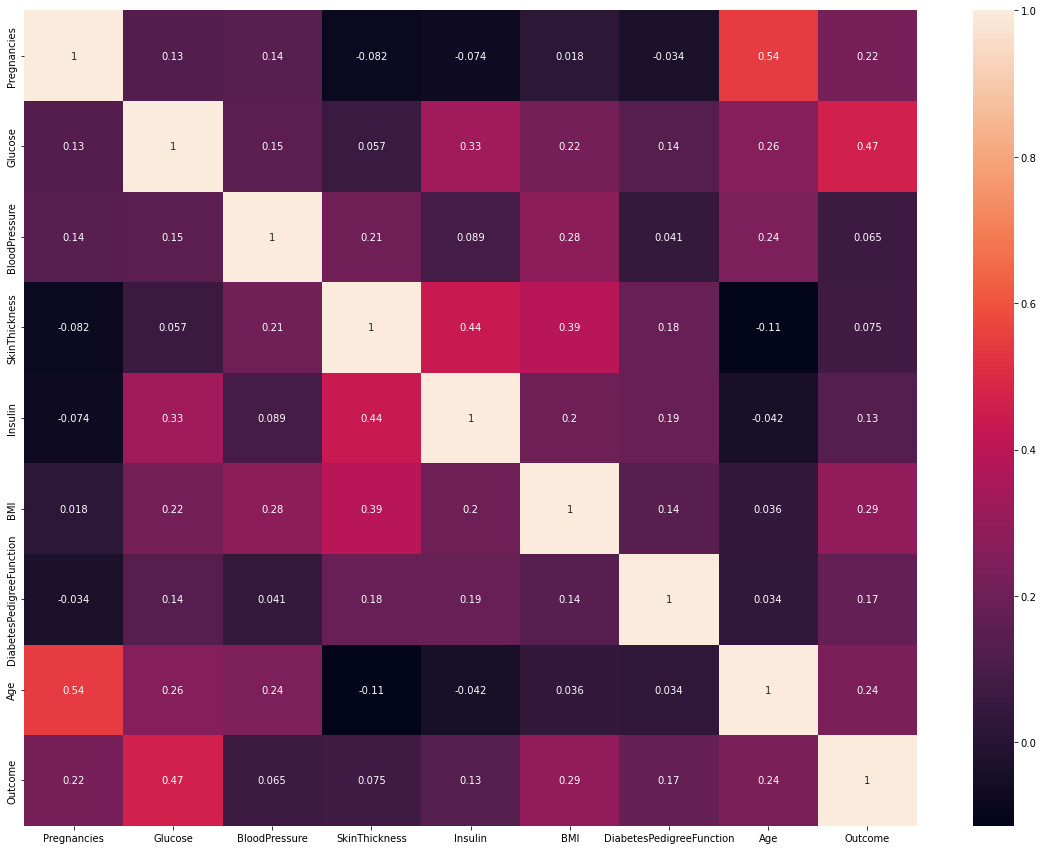

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

<AxesSubplot:xlabel='BMI', ylabel='Age'>

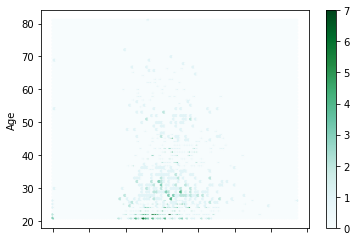

In [49]:
df.plot.hexbin(x="BMI",y="Age")

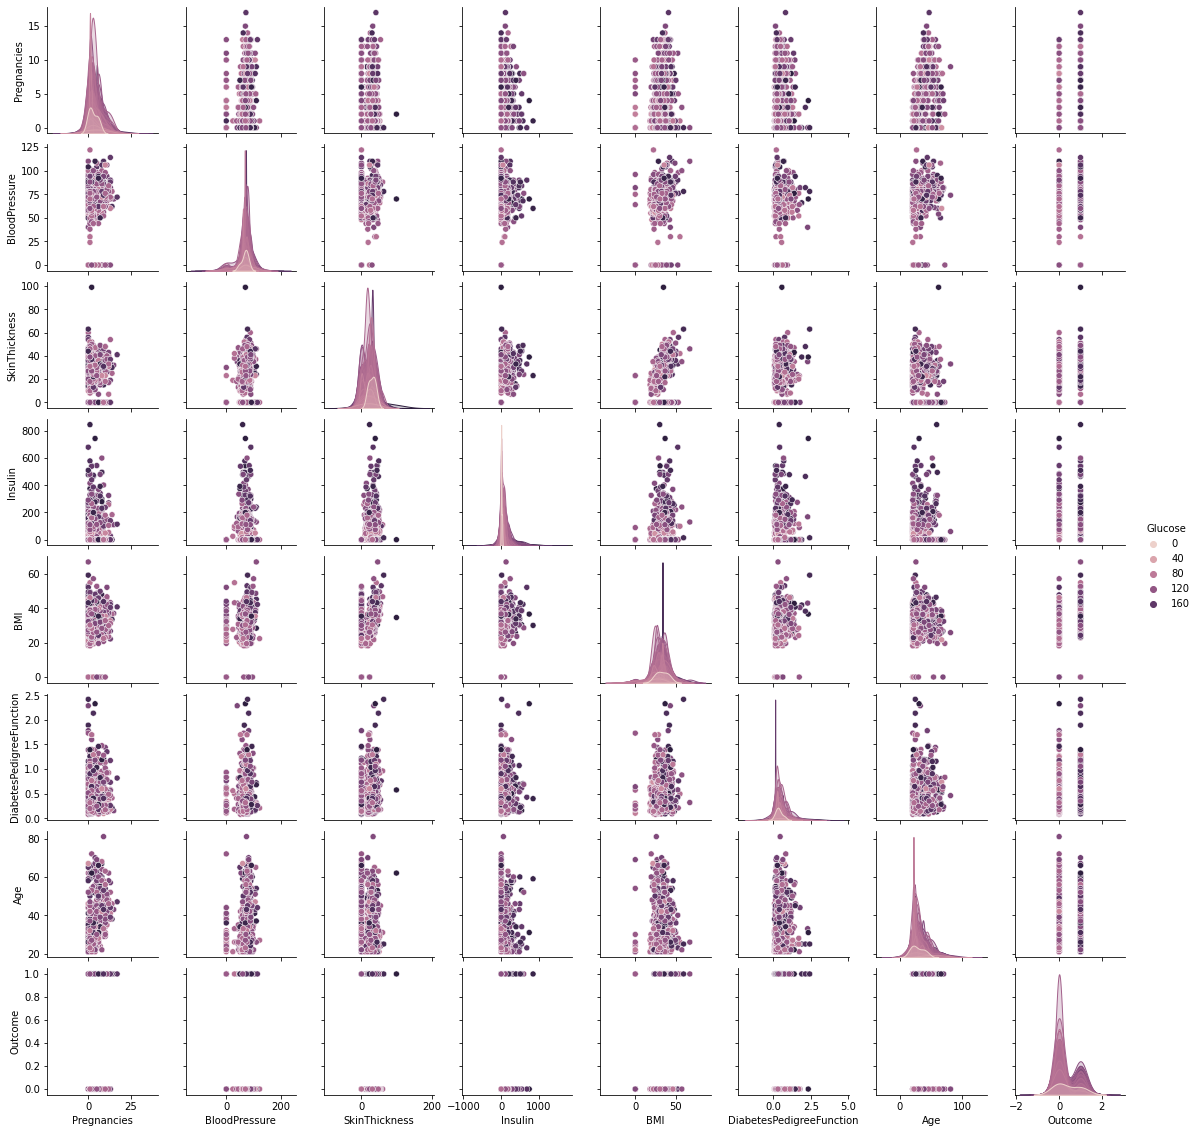

In [43]:
sns.pairplot(df,hue='Glucose', height=2)

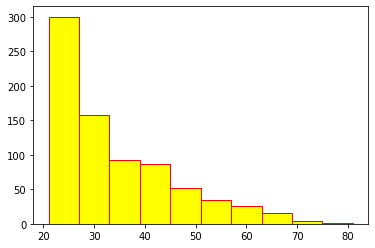

In [42]:
plt.hist(df["Age"],color ='yellow',edgecolor='r')
plt.show()

<AxesSubplot:ylabel='Outcome'>

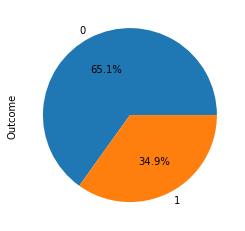

In [41]:
df["Outcome"].value_counts().plot(kind="pie",autopct='%.1f%%')

# Random Forest Classifier

In [40]:
 y = df['Outcome']

In [41]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [42]:
df =df.drop('Outcome', axis=1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df ,y , test_size=0.2 , random_state =42)

In [44]:
print(x_train.shape, y_train.shape )

(614, 7) (614,)


In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)

In [46]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [47]:
y_predv =rfc.predict(x_test)

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)
DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)
DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


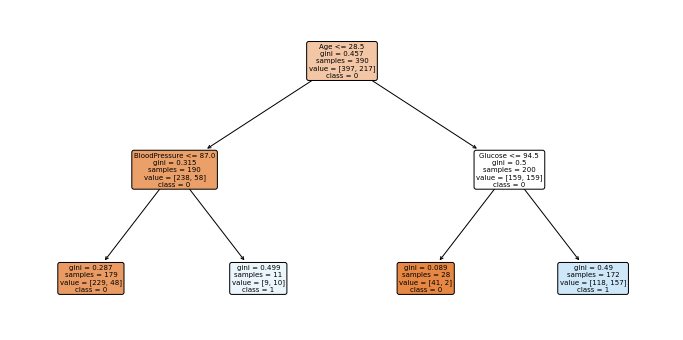

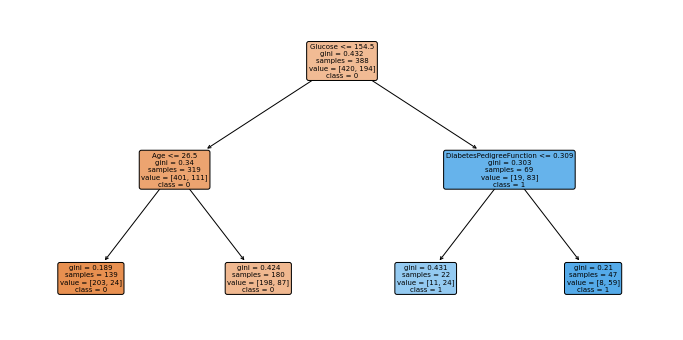

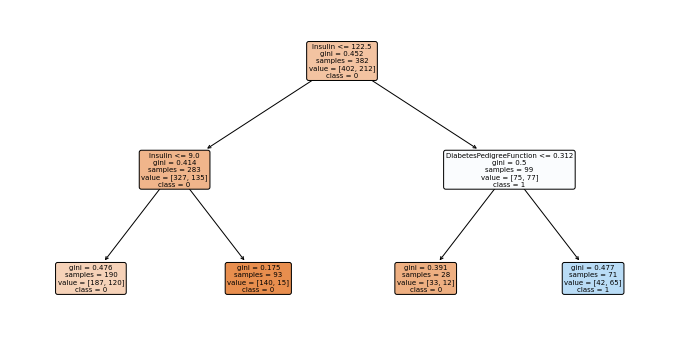

In [48]:
from sklearn import tree

feature=  df.columns.values
classes = ['0','1','2']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,feature_names=feature, class_names=classes,fontsize=7,filled=True,rounded=True)

              precision    recall  f1-score   support

           0       0.72      0.94      0.82        99
           1       0.76      0.35      0.47        55

    accuracy                           0.73       154
   macro avg       0.74      0.64      0.65       154
weighted avg       0.73      0.73      0.69       154



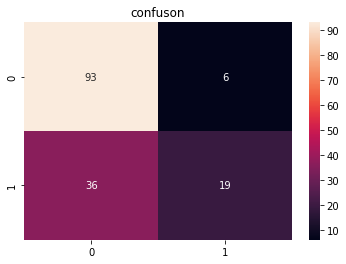

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test , y_predv)
sns.heatmap(cm,annot= True, fmt ="d").set_title("confuson")

print(classification_report(y_test, y_predv))

# Regressor

In [52]:
 y = df['BMI']

In [53]:
df =df.drop('BMI', axis=1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df ,y , test_size=0.2 , random_state =42)

In [55]:
print(x_train.shape, y_train.shape )

(614, 8) (614,)


In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rfc = RandomForestRegressor(n_estimators=3, max_depth=2, random_state=42)

In [58]:
rfc.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=3, random_state=42)

In [59]:
y_predv =rfc.predict(x_test)

DecisionTreeRegressor(max_depth=2, max_features='auto', random_state=1608637542)
DecisionTreeRegressor(max_depth=2, max_features='auto', random_state=1273642419)
DecisionTreeRegressor(max_depth=2, max_features='auto', random_state=1935803228)


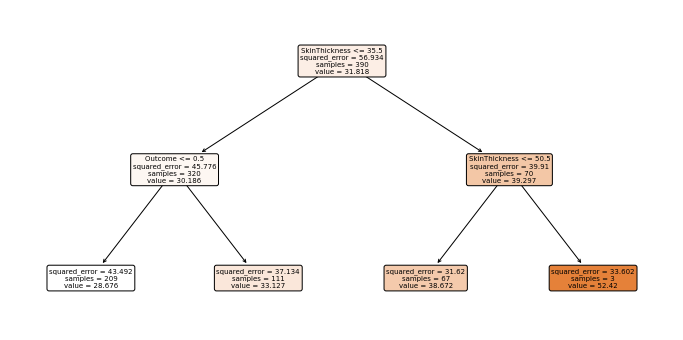

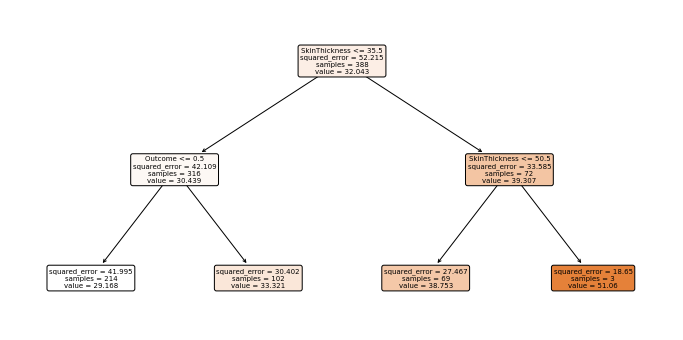

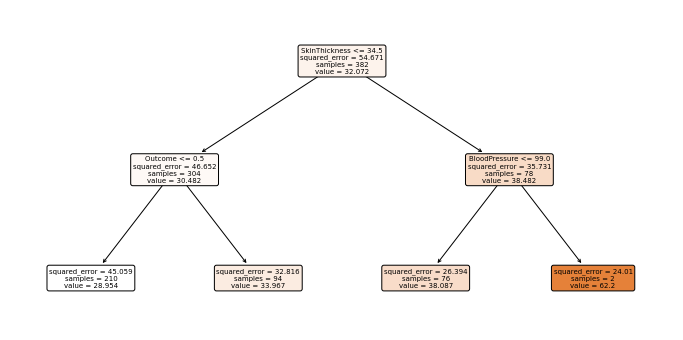

In [60]:
from sklearn import tree

feature=  df.columns.values
classes = ['0','1','2']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,feature_names=feature, class_names=classes,fontsize=7,filled=True,rounded=True)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
print("The mean square error is",mean_squared_error(y_test, y_predv))
print("The mean absolute error is",mean_absolute_error(y_test, y_predv))

The mean square error is 60.569988771513515
The mean absolute error is 5.600073832118909


In [63]:
print("The root mean sq error is",np.sqrt(mean_squared_error(y_test, y_predv)))

The root mean sq error is 7.782672341266431


# DECISION TREE CLASSIFIER

In [116]:
y = df['Outcome']

In [117]:
df =df.drop('Outcome', axis=1)

In [118]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.1, random_state=42)

In [120]:
print(X_train.shape, Y_train.shape)

(691, 8) (691,)


In [121]:
print(X_test.shape, Y_test.shape)

(77, 8) (77,)


In [155]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

In [156]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [157]:
prediction = DT.predict(X_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [158]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        50
           1       0.69      0.81      0.75        27

    accuracy                           0.81        77
   macro avg       0.79      0.81      0.79        77
weighted avg       0.82      0.81      0.81        77



In [159]:
DT.score(X_test, Y_test)

0.8051948051948052

In [166]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)  #max_depth = 3
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [167]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- class: 0
|   |   |--- feature_5 >  30.95
|   |   |   |--- class: 0
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.35
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.35
|   |   |   |--- class: 0
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- feature_1 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  145.50
|   |   |   |--- class: 1
|   |--- feature_5 >  29.95
|   |   |--- feature_1 <= 157.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  157.50
|   |   |   |--- class: 1



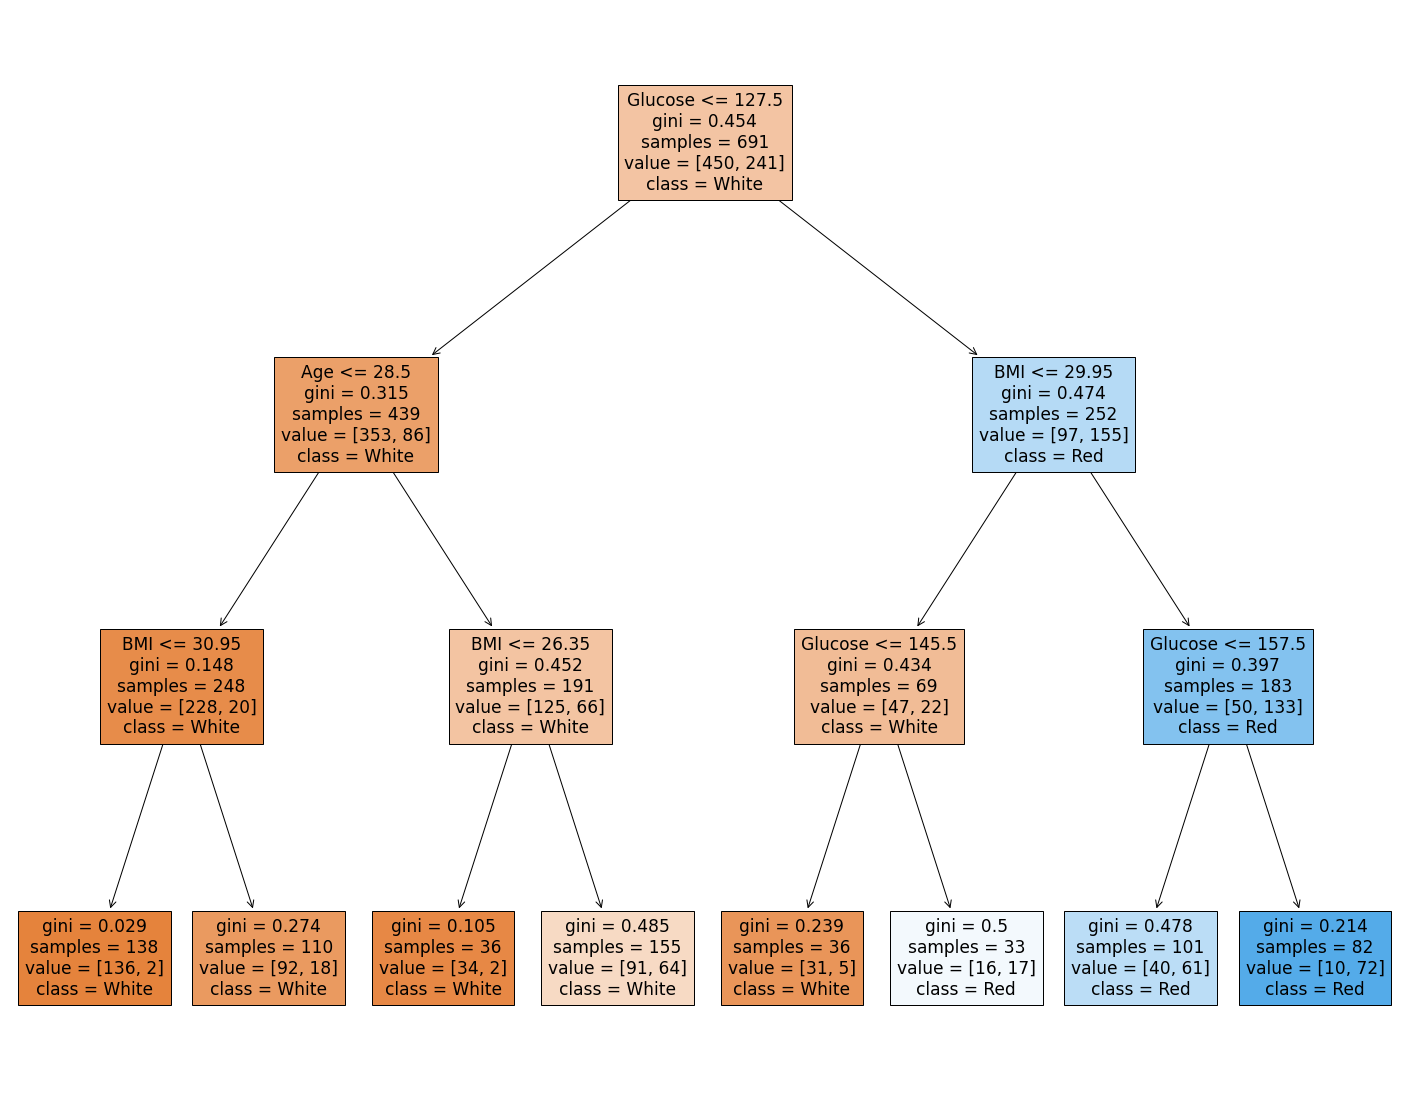

In [168]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=df.columns,
                   class_names=['White', "Red"],
                   filled=True)

# Decision Tree in Regression

In [172]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [173]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X_train, Y_train)

In [174]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- value: [0.01]
|   |   |--- feature_5 >  30.95
|   |   |   |--- value: [0.16]
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.35
|   |   |   |--- value: [0.06]
|   |   |--- feature_5 >  26.35
|   |   |   |--- value: [0.41]
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- feature_1 <= 145.50
|   |   |   |--- value: [0.14]
|   |   |--- feature_1 >  145.50
|   |   |   |--- value: [0.52]
|   |--- feature_5 >  29.95
|   |   |--- feature_1 <= 157.50
|   |   |   |--- value: [0.60]
|   |   |--- feature_1 >  157.50
|   |   |   |--- value: [0.88]



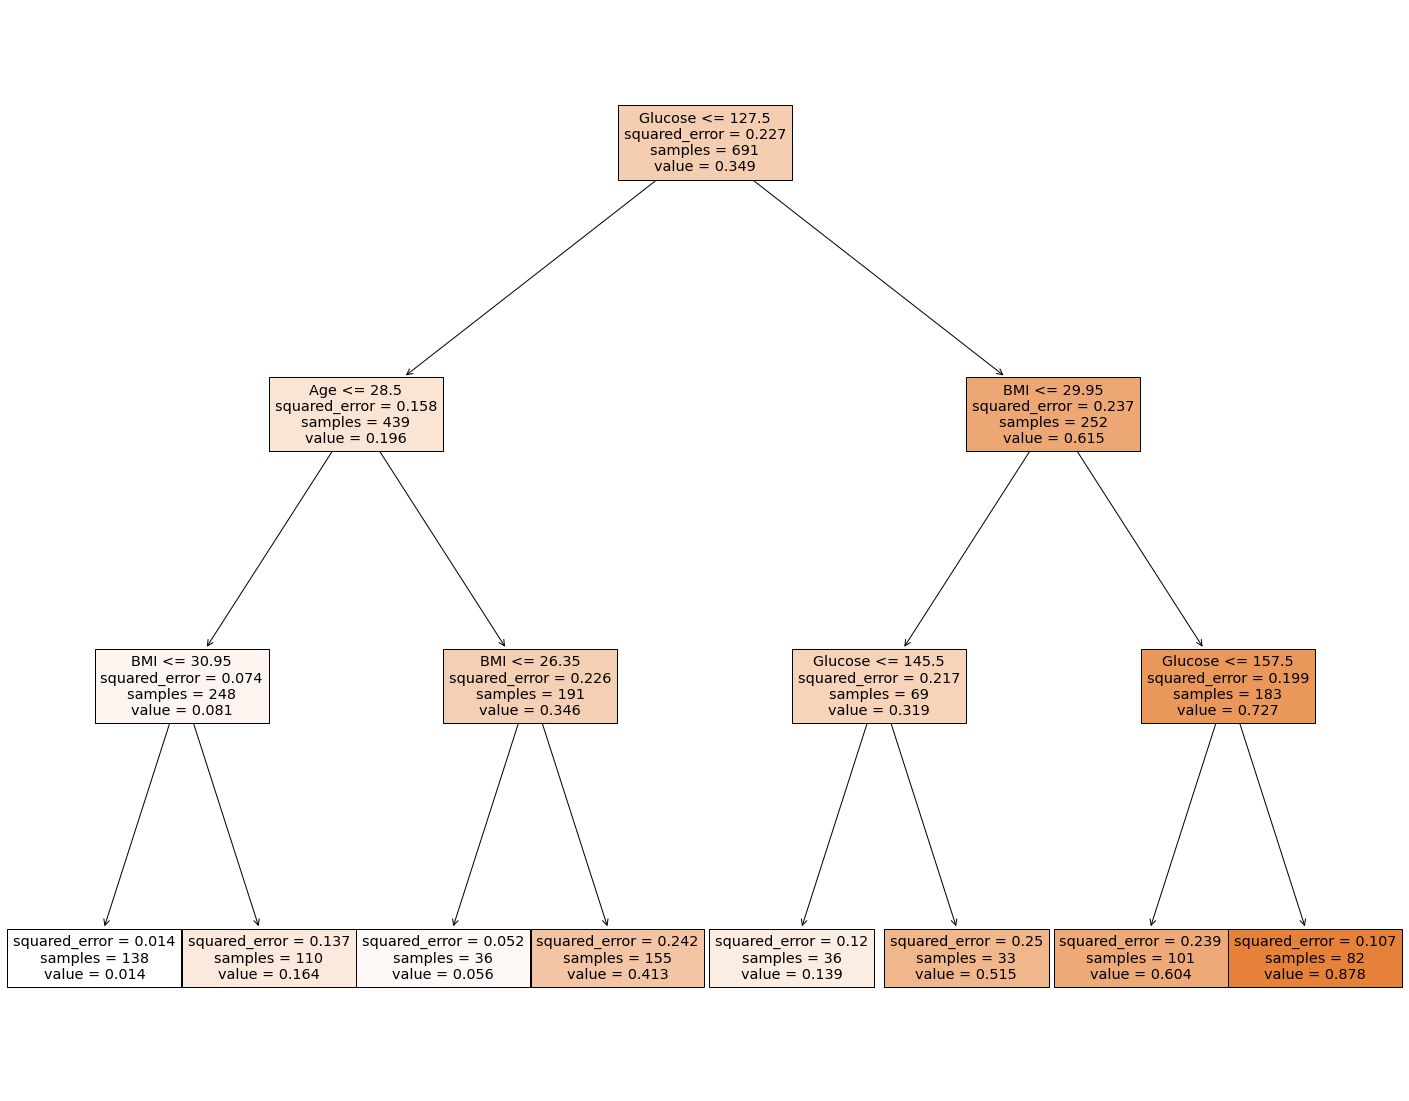

In [179]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=df.columns, filled=True)